In [1]:
# Import Libraries for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from collections import Counter
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis

In [2]:
#Load dataset and see the shape, from below, we have 9576 & 10 columns as regards to our data shape. 
df = pd.read_excel(r"C:\Users\HENRY OKEOMA\Downloads\Car_Sales.xlsx")
df

car    price       body  mileage  engV engType registration  \
0              Ford  15500.0  crossover       68   2.5     Gas          yes   
1     Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2     Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3     Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4     Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   
...             ...      ...        ...      ...   ...     ...          ...   
9571        Hyundai  14500.0  crossover      140   2.0     Gas          yes   
9572     Volkswagen   2200.0      vagon      150   1.6  Petrol          yes   
9573  Mercedes-Benz  18500.0  crossover      180   3.5  Petrol          yes   
9574          Lexus  16999.0      sedan      150   3.5     Gas          yes   
9575           Audi  22500.0      other       71   3.6  Petrol          yes   

      year      model  drive  
0     2010       Kuga   full  
1     2011    E-Class   rear  
2     2008     CL 550   rear  
3     2012      B 180  front  
4     2013    E-Class    NaN  
...    ...        ...    ...  
9571  2011     Tucson  front  
9572  1986  Passat B2  front  
9573  2008     ML 350   full  
9574  2008     ES 350  front  
9575  2007         Q7   full  

[9576 rows x 10 columns]

In [3]:
# Check data for more understanding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


we have some missing values in our dataset, hence the data will need further cleaning, now we shall check for duplicates.

In [4]:
# Check for duplicates
df.duplicated().sum()

113

We have about 113 duplicated values in our dataset.

In [5]:
# Chech the Numerical variables of the dataset and convert them to integers
df.describe().astype(int)

price  mileage  engV  year
count    9576     9576  9142  9576
mean    15633      138     2  2006
std     24106       98     5     7
min         0        0     0  1953
25%      4999       70     1  2004
50%      9200      128     2  2008
75%     16700      194     2  2012
max    547800      999    99  2016

In [6]:
# Missing Value Counts to understand the extent of the missing values
df.isna().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [7]:
# Total sum of the missing values
df.isna().sum().sum()

945

In [25]:
pip install -U pandas-profiling

     -------------------------------------- 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 345.9/345.9 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 663.5/663.5 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 7.7 MB/s eta 0:00:00
     -------------------------------------- 102.7/102.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 296.5/296.5 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 7.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=bc335f59d9fa469b8e0723d443c569bfb852624a20236ef7d2cb5fad147135c7
  Stored in directory: c:\users\henry okeoma\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
Note: you may need to rest

In [3]:
from pandas_profiling import ProfileReport

In [4]:
df_profile = ProfileReport(df, title='df_of_CarSales_before cleaning')
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# DATA CLEANING.
# MAKE A COPY OF THE DATA FRAME 
df1 = df.copy()
df1.head(3)

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   

   year    model drive  
0  2010     Kuga  full  
1  2011  E-Class  rear  
2  2008   CL 550  rear

In [11]:
# We need to rename the features to more appropriate headers and easier to read
df.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [12]:
df.columns = ['Car_Brands', 'Price', 'Body_type', 'Mileage', 'Engine_volume', 'Engine_type', 'Registration',
       'Year', 'Car_model', 'Drive_type']
df.head(2)

Car_Brands    Price  Body_type  Mileage  Engine_volume Engine_type  \
0           Ford  15500.0  crossover       68            2.5         Gas   
1  Mercedes-Benz  20500.0      sedan      173            1.8         Gas   

  Registration  Year Car_model Drive_type  
0          yes  2010      Kuga       full  
1          yes  2011   E-Class       rear

In [13]:
# Now we need to handle the duplicates by dropping them (we recorded about 113 duplicates)
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
# Now we had some missing values on the EngV (now Engine_Volume) and the drive(now Drive_type).
# the former is a numerical variable while the later is categorical variable.
# We need to bring in the measures of central tendency to replace these values.

In [15]:
# Find the Mode for the categorical valuable in Drive_type feature
df['Drive_type'].mode()

0    front
Name: Drive_type, dtype: object

In [14]:
df.groupby('Drive_type').count()

Car_Brands  Price  Body_type  Mileage  Engine_volume  Engine_type  \
Drive_type                                                                      
front             5171   5171       5171     5171           4956         5171   
full              2422   2422       2422     2422           2366         2422   
rear              1360   1360       1360     1360           1305         1360   

            Registration  Year  Car_model  
Drive_type                                 
front               5171  5171       5171  
full                2422  2422       2422  
rear                1360  1360       1360

In [16]:
# We need to fill the missing values on the Drive_type column with the mode = 'front'
df['Drive_type'] = df['Drive_type'].fillna('front')

In [18]:
df.info() ...# we can see that we have filed the Drive_type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Brands     9463 non-null   object 
 1   Price          9463 non-null   float64
 2   Body_type      9463 non-null   object 
 3   Mileage        9463 non-null   int64  
 4   Engine_volume  9029 non-null   float64
 5   Engine_type    9463 non-null   object 
 6   Registration   9463 non-null   object 
 7   Year           9463 non-null   int64  
 8   Car_model      9463 non-null   object 
 9   Drive_type     9463 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [19]:
# We also need to fill the missing values of the Engine_volumes with the median. 
#In this case we can also use the mean as they are the same. Using the median as a habit

df['Engine_volume'] = df.groupby(['Car_Brands','Body_type'])['Engine_volume'].transform(lambda x: x.fillna(x.median()))

In [20]:
# Check the final data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9463 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Brands     9463 non-null   object 
 1   Price          9463 non-null   float64
 2   Body_type      9463 non-null   object 
 3   Mileage        9463 non-null   int64  
 4   Engine_volume  9453 non-null   float64
 5   Engine_type    9463 non-null   object 
 6   Registration   9463 non-null   object 
 7   Year           9463 non-null   int64  
 8   Car_model      9463 non-null   object 
 9   Drive_type     9463 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 813.2+ KB


In [21]:
#
df.isna().sum() # we still have some missing values in our engine volumes, then we have to drop them

Car_Brands        0
Price             0
Body_type         0
Mileage           0
Engine_volume    10
Engine_type       0
Registration      0
Year              0
Car_model         0
Drive_type        0
dtype: int64

In [22]:
# We now drop the values with the below
df.dropna(subset=['Engine_volume'],inplace=True)
df.isna().sum()

Car_Brands       0
Price            0
Body_type        0
Mileage          0
Engine_volume    0
Engine_type      0
Registration     0
Year             0
Car_model        0
Drive_type       0
dtype: int64

In [23]:
# Dropping Entrie with Price <=0
df.Price[df.Price == 0].count()

238

In [24]:
df = df.drop(df[df.Price <= 0].index)
df.Price[df.Price == 0].count()

0

We have succeeded in cleaning our data, we have removed duplicates, we have replaced missing values, we have also dropped the zeros and our data is clean for analysis and visualisations, but before we do that, we can have a post profile after cleaning.

In [25]:
df_profile2 = ProfileReport(df, title='df_of_CarSales_After cleaning')
df_profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
df.head(2)

Car_Brands    Price  Body_type  Mileage  Engine_volume Engine_type  \
0           Ford  15500.0  crossover       68            2.5         Gas   
1  Mercedes-Benz  20500.0      sedan      173            1.8         Gas   

  Registration  Year Car_model Drive_type  
0          yes  2010      Kuga       full  
1          yes  2011   E-Class       rear

In [ ]:
# Questions for  Analysis
#1. Which type of cars are sold maximum?
#2. What is the correlation between price and mileage?
#3. How many cars are registered?
#4. Does the registration status influence car price? 
#5. What is the car price distribution based on Engine Value?
#6. Which car type has the highest pricing?


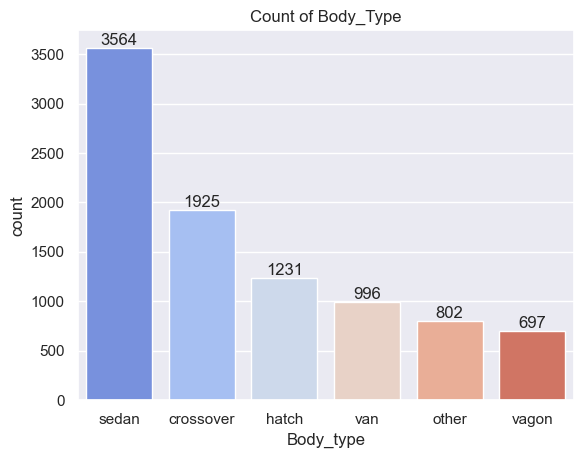

In [37]:
#1. Which type of cars are sold maximum?
ax = sns.countplot(x=df["Body_type"], order = df["Body_type"].value_counts(ascending=False).index, palette='coolwarm')
values = df["Body_type"].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title("Count of Body_Type");

Insight: We can see that the sedan body_type of cars sold the maximum from the dataset

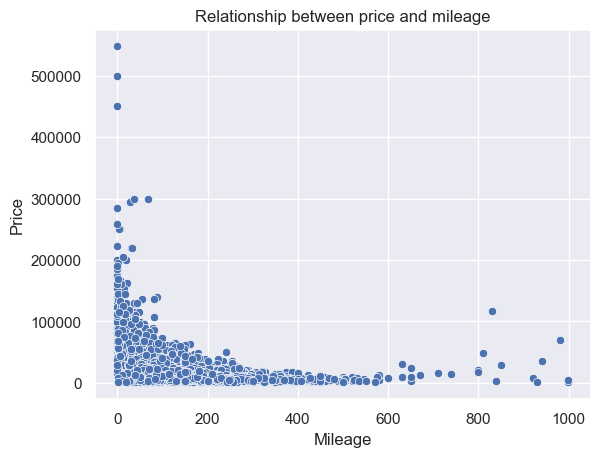

In [39]:
2. # Relationship between price and mileage
plt.title('Relationship between price and mileage')
sns.scatterplot(y='Price', x='Mileage', data=df);

Insights:
There is a negative correlation between price and mileage. Car of lower mileage, have a higher price and vise versa. Most of the Mileages are between 0 and  400 with price range of 0 - 150,000. 

Also we can see some outliers in the plot

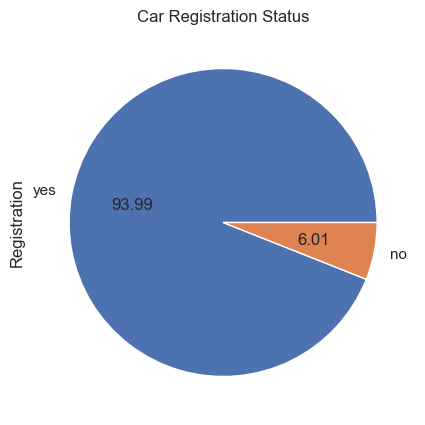

In [41]:
#3. How many cars are registered?
plt.figure(figsize =(10,5))
df['Registration'].value_counts(normalize=True).plot.pie(autopct="%.2f")
plt.title("Car Registration Status");

Insight:

Most of the cars are registered with a number of 93.99%, while just 6% is not registered


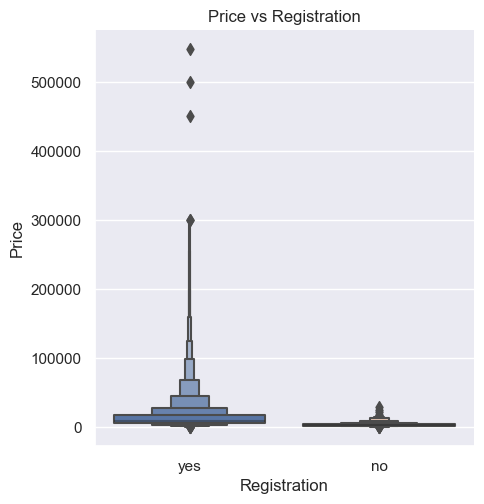

In [62]:
#4. Does the registration status influence car price?

sns.catplot(y='Price', x='Registration', data=df, kind='boxen')
plt.title('Price vs Registration')
plt.show()

Insight:
The prices for non registered cars are very much lower than registered cars


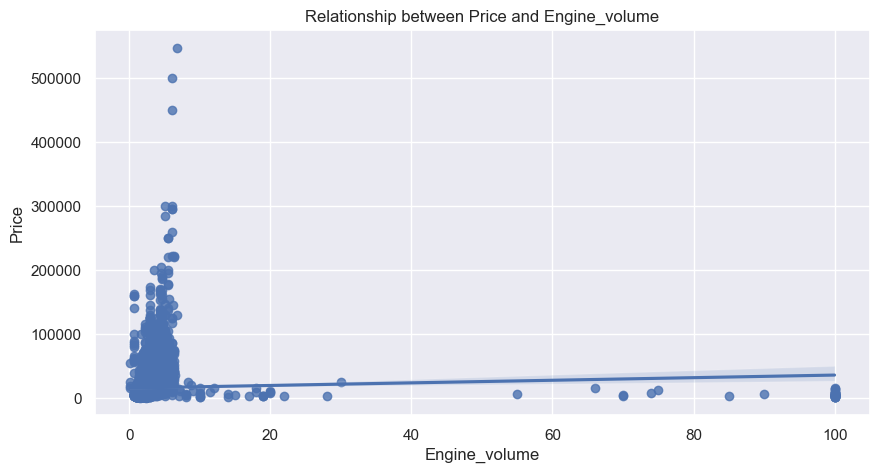

In [64]:
# 5. What is the car price distribution based on Engine Value?

plt.figure(figsize=(10,5))
sns.regplot(x='Engine_volume',y='Price',data=df)
plt.title("Relationship between Price and Engine_volume");

Insight:
Very weak positive correlation between the price/engine_volume. Most of the enine_volume are clustered around 1 & 5 engine volume with prices below 150,000

In [77]:
#6. Which car type has the highest pricing (Body_type)? 
# We shall group the body_type and sum the prices of each
bodytype_p = df.groupby('Body_type')['Price'].sum().astype(int).sort_values(ascending=False)
bodytype_p

Body_type
crossover    57586303
sedan        43544740
other        15779573
van          10664374
hatch        10418273
vagon         6213373
Name: Price, dtype: int32

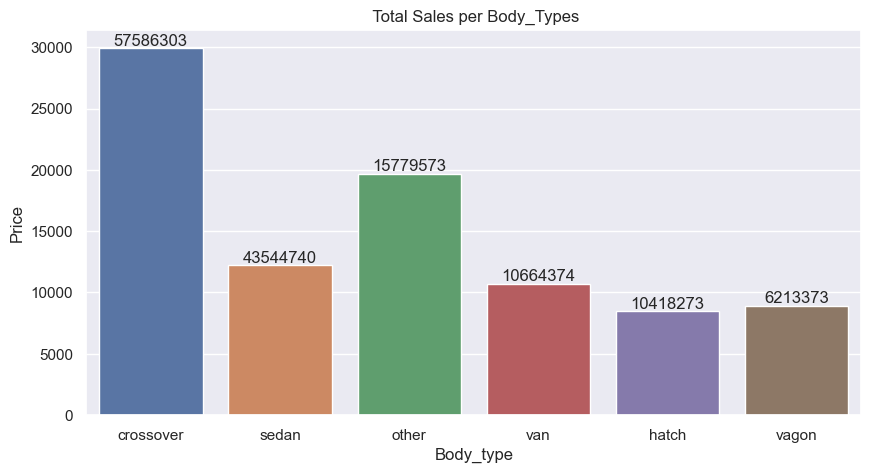

In [84]:
# We shall use a simple barchart to visualise the Data
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Body_type',y='Price', data=df, ci=None, order=bodytype_p.index)
values = bodytype_p.values
ax.bar_label(container = ax.containers[0], labels=values)
plt.title(" Total Sales per Body_Types")
plt.show();

Insight:
The Crossover car types generated the highest income, although as we saw before, Sedan cars are sold the most.

Irrespective of the fact that Car type sedan was sold most (per count), crossover generated highest income (per price)

In [40]:
df.head(2)

Car_Brands    Price  Body_type  Mileage  Engine_volume Engine_type  \
0           Ford  15500.0  crossover       68            2.5         Gas   
1  Mercedes-Benz  20500.0      sedan      173            1.8         Gas   

  Registration  Year Car_model Drive_type  
0          yes  2010      Kuga       full  
1          yes  2011   E-Class       rear

In [30]:
# Car Brand with the highest price
C_brand_max = df.loc[df['Price'] == df['Price'].max(), ['Car_Brands','Price']]
C_brand_max

Car_Brands     Price
7621    Bentley  547800.0

Insight: Bentley is the Car with the highest Price

In [31]:
# Car Brand with the least price
C_brand_min = df.loc[df['Price'] == df['Price'].min(), ['Car_Brands','Price']]
C_brand_min

Car_Brands   Price
5010        GAZ  259.35

In [ ]:
Insight: Gaz is the car with the least price

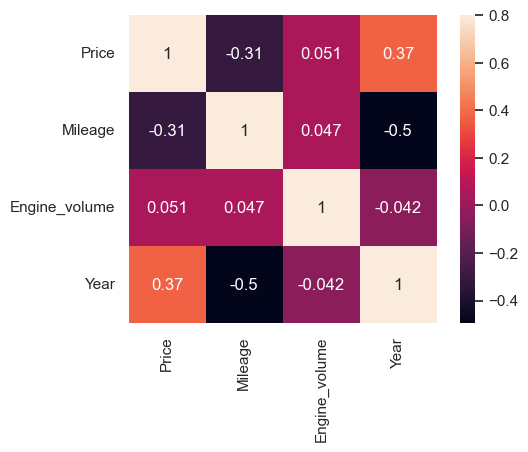

In [54]:
# Correlation on the numeric variable

a = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(a, vmax=.8, square=True, annot=True)
plt.show()

From the above plot, we have a negative correlation between Price and Mileage, as one is increasing the other is decreasing. Also we have a weak postive correlation between price and year.

Summary and Insights
1. Sedan car types are sold the maximum.
2. There is a negative correlation between price and mileage
3. Most of the cars are registered with a number of 93.99%, while just 6% is not registered.
4. The prices for non registered cars are very much lower than registered cars
5. Very weak positive correlation between the price/engine_volume. Most of the enine_volume are clustered around 1 & 5 engine volume with prices below 150,000
6. The Crossover car types generated the highest income, although as we saw before, Sedan cars are sold the most.Irrespective of the fact that Car type sedan was sold most (per count), crossover generated highest income (per price)